# Impact of the geometry on HPL performance

In [1]:
import io
import zipfile
import os
import pandas
from plotnine import *
import plotnine
plotnine.options.figure_size = (12, 8)
import yaml
import warnings
warnings.simplefilter(action='ignore') # removing annoying Pandas warning

def get_yaml(archive_name, yaml_name):
    archive = zipfile.ZipFile(archive_name)
    return yaml.load(io.BytesIO(archive.read(yaml_name)))

def get_platform(archive_name):
    info = get_yaml(archive_name, 'info.yaml')
    expfiles = info['expfile']
    platform = [f for f in expfiles if f.endswith('xml')]
    assert len(platform) == 1
    return platform[0]

def read_result(name):
    archive = zipfile.ZipFile(name)
    df = pandas.read_csv(io.BytesIO(archive.read('results.csv')))
    df['filename'] = name
    return df

directory = 'geometry/4'
archives = [os.path.join(directory, f) for f in os.listdir(directory)]

df = pandas.concat([read_result(a) for a in archives])
df['geometry'] = df['proc_p'].astype(str) + '×' + df['proc_q'].astype(str)
df.head()

,matrix_size,block_size,proc_p,proc_q,pfact,rfact,bcast,depth,swap,mem_align,process_per_node,thread_per_process,time,gflops,residual,start_timestamp,stop_timestamp,filename,geometry
0,250000,128,10,96,1,2,2,1,0,8,32,1,511.37,20370.0,0.000613,2020-06-27 13:11:59.448008,2020-06-27 13:20:36.826750,geometry/4/grenoble_2020-06-27_1937864.zip,10×96
1,250000,128,64,15,1,2,2,1,0,8,32,1,516.79,20160.0,0.000687,2020-06-27 13:20:37.628040,2020-06-27 13:29:21.102504,geometry/4/grenoble_2020-06-27_1937864.zip,64×15
2,250000,128,960,1,1,2,2,1,0,8,32,1,5130.79,2030.0,0.001543,2020-06-27 13:29:23.136470,2020-06-27 14:55:01.580986,geometry/4/grenoble_2020-06-27_1937864.zip,960×1
3,250000,128,2,480,1,2,2,1,0,8,32,1,943.59,11040.0,0.001193,2020-06-27 14:55:03.584401,2020-06-27 15:10:53.869284,geometry/4/grenoble_2020-06-27_1937864.zip,2×480
4,250000,128,160,6,1,2,2,1,0,8,32,1,987.22,10550.0,0.001079,2020-06-27 15:10:54.646837,2020-06-27 15:27:28.243292,geometry/4/grenoble_2020-06-27_1937864.zip,160×6


### Checking the parameters

In [2]:
name_exceptions = {'application_time', 'simulation_time', 'usr_time', 'sys_time', 'time', 'gflops', 'residual', 'cpu_utilization',
                   'dgemm_coefficient', 'dgemm_intercept', 'dtrsm_coefficient', 'dtrsm_intercept',
                   'stochastic_cpu', 'polynomial_dgemm', 'stochastic_network', 'heterogeneous_dgemm', 'platform', 'model', 'filename',
                   'simulation', 'slow_nodes',
                   'major_page_fault', 'minor_page_fault', 'matrix_size', 'mode',
                   'start_timestamp', 'stop_timestamp'}
colnames = set(df) - name_exceptions
df[list(colnames)].drop_duplicates()

,geometry,pfact,proc_q,process_per_node,bcast,depth,proc_p,block_size,mem_align,swap,thread_per_process,rfact
0,10×96,1,96,32,2,1,10,128,8,0,1,2
1,64×15,1,15,32,2,1,64,128,8,0,1,2
2,960×1,1,1,32,2,1,960,128,8,0,1,2
3,2×480,1,480,32,2,1,2,128,8,0,1,2
4,160×6,1,6,32,2,1,160,128,8,0,1,2
5,32×30,1,30,32,2,1,32,128,8,0,1,2
6,30×32,1,32,32,2,1,30,128,8,0,1,2
7,3×320,1,320,32,2,1,3,128,8,0,1,2
8,20×48,1,48,32,2,1,20,128,8,0,1,2
9,24×40,1,40,32,2,1,24,128,8,0,1,2


## HPL performance

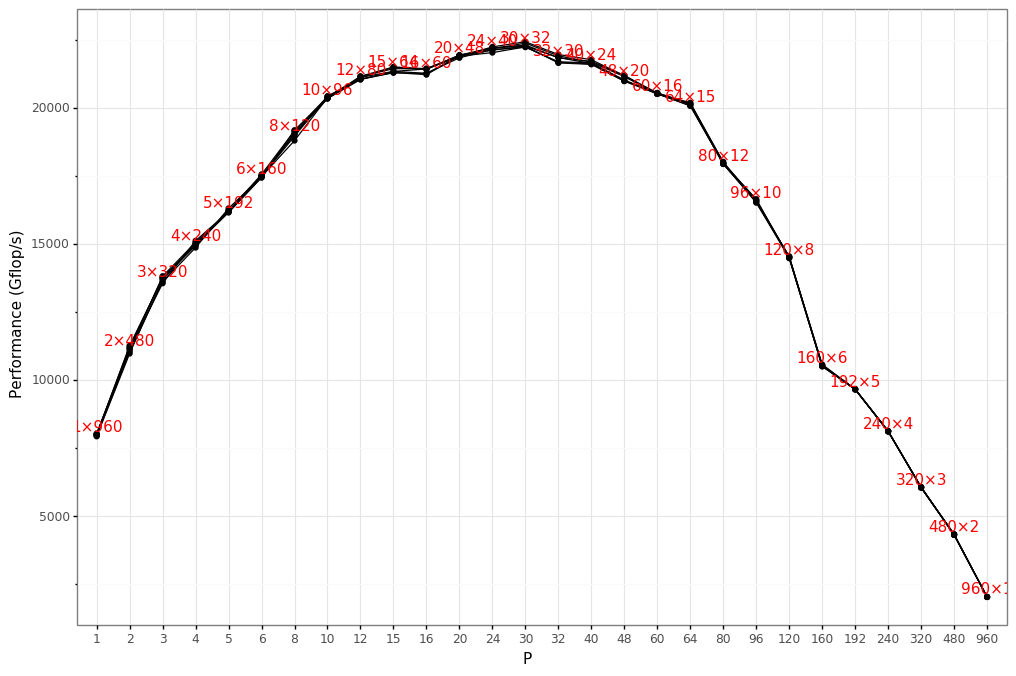

<ggplot: (8735217275126)>

In [3]:
df['group'] = df['filename'] + ':' + df['matrix_size'].astype(str)
txt = df.groupby(['proc_p', 'geometry'])[['gflops']].mean().reset_index()
(ggplot(df)
    + aes(x='factor(proc_p)', y='gflops')
    + geom_point()
    + geom_line(aes(group='group'))
    + geom_text(aes(label='geometry'), data=txt, position=position_nudge(y=300), color='red')
    + theme_bw()
    + labs(x='P', y='Performance (Gflop/s)', color='Matrix size')
)

## Monitoring

In [4]:
import cashew
print(cashew.__git_version__)
from cashew import archive_extraction as ae

f6e1abe82ebba1eec668652189985c631c10b5b5


In [5]:
monitoring = pandas.concat([ae.read_monitoring(f) for f in archives[:3]])  # Loading all the archives takes too much memory...
monitoring['date'] = pandas.to_datetime(monitoring['start_time'], unit='s').astype(str)
monitoring['abs_timestamp'] = pandas.to_datetime(monitoring['timestamp'], unit='s')
for date in monitoring['date'].unique():
    monitoring.loc[monitoring['date'] == date, 'real_start_time'] = monitoring[monitoring['date'] == date]['timestamp'].min()
monitoring['start_exp'] -= monitoring['real_start_time']
monitoring['stop_exp'] -= monitoring['real_start_time']
monitoring['timestamp'] -= monitoring['real_start_time']
monitoring['cpu_id'] = monitoring['node'].astype(str) + ':' + monitoring['cpu'].astype(str)
print(len(monitoring))
monitoring.head()

30822592


,timestamp,cluster,node,jobid,start_time,expfile_hash,value,cpu,core,kind,start_exp,stop_exp,date,abs_timestamp,real_start_time,cpu_id
0,0.002843,dahu,1,1937864,1593255252,e1372872ed029e3e5754009ab3eca90f42b6f853e5aed1...,1.264050,0,0,frequency,677.687343,26838.745382,2020-06-27 10:54:12,2020-06-27 13:00:39.893036127,1.593263e+09,1:0
1,5.015566,dahu,1,1937864,1593255252,e1372872ed029e3e5754009ab3eca90f42b6f853e5aed1...,3.500939,0,0,frequency,677.687343,26838.745382,2020-06-27 10:54:12,2020-06-27 13:00:44.905758858,1.593263e+09,1:0
2,10.028024,dahu,1,1937864,1593255252,e1372872ed029e3e5754009ab3eca90f42b6f853e5aed1...,1.000012,0,0,frequency,677.687343,26838.745382,2020-06-27 10:54:12,2020-06-27 13:00:49.918216944,1.593263e+09,1:0
3,15.039885,dahu,1,1937864,1593255252,e1372872ed029e3e5754009ab3eca90f42b6f853e5aed1...,1.000012,0,0,frequency,677.687343,26838.745382,2020-06-27 10:54:12,2020-06-27 13:00:54.930078030,1.593263e+09,1:0
4,20.051931,dahu,1,1937864,1593255252,e1372872ed029e3e5754009ab3eca90f42b6f853e5aed1...,1.000140,0,0,frequency,677.687343,26838.745382,2020-06-27 10:54:12,2020-06-27 13:00:59.942124128,1.593263e+09,1:0


In [6]:
df['start_timestamp'] = pandas.to_datetime(df['start_timestamp'])
df['stop_timestamp'] = pandas.to_datetime(df['stop_timestamp'])

In [7]:
results = df.reset_index()

for i, row in results.iterrows():
    tmp = monitoring[(monitoring['abs_timestamp'] > row['start_timestamp']) & (monitoring['abs_timestamp'] < row['stop_timestamp'])]
    avg_freq = tmp[tmp['kind'] == 'frequency'].groupby('cpu_id')['value'].mean()
    results.loc[results.index[i], 'min_freq'] = avg_freq.min()
    results.loc[results.index[i], 'max_freq'] = avg_freq.max()
    results.loc[results.index[i], 'med_freq'] = avg_freq.median()
    avg_temp = tmp[tmp['kind'] == 'temperature'].groupby('cpu_id')['value'].mean()
    results.loc[results.index[i], 'min_temp'] = avg_temp.min()
    results.loc[results.index[i], 'max_temp'] = avg_temp.max()
    results.loc[results.index[i], 'med_temp'] = avg_temp.median()
results.head()

,index,matrix_size,block_size,proc_p,proc_q,pfact,rfact,bcast,depth,swap,...,stop_timestamp,filename,geometry,group,min_freq,max_freq,med_freq,min_temp,max_temp,med_temp
0,0,250000,128,10,96,1,2,2,1,0,...,2020-06-27 13:20:36.826750,geometry/4/grenoble_2020-06-27_1937864.zip,10×96,geometry/4/grenoble_2020-06-27_1937864.zip:250000,1.969154,2.451146,2.263689,57.975121,80.966019,66.263956
1,1,250000,128,64,15,1,2,2,1,0,...,2020-06-27 13:29:21.102504,geometry/4/grenoble_2020-06-27_1937864.zip,64×15,geometry/4/grenoble_2020-06-27_1937864.zip:250000,2.005620,2.447765,2.283119,58.304087,80.289286,66.290865
2,2,250000,128,960,1,1,2,2,1,0,...,2020-06-27 14:55:01.580986,geometry/4/grenoble_2020-06-27_1937864.zip,960×1,geometry/4/grenoble_2020-06-27_1937864.zip:250000,2.558498,2.758080,2.729490,54.956140,80.561525,65.773696
3,3,250000,128,2,480,1,2,2,1,0,...,2020-06-27 15:10:53.869284,geometry/4/grenoble_2020-06-27_1937864.zip,2×480,geometry/4/grenoble_2020-06-27_1937864.zip:250000,2.156667,2.653257,2.533356,58.947368,81.431908,67.018092
4,4,250000,128,160,6,1,2,2,1,0,...,2020-06-27 15:27:28.243292,geometry/4/grenoble_2020-06-27_1937864.zip,160×6,geometry/4/grenoble_2020-06-27_1937864.zip:250000,2.196043,2.612466,2.517515,58.639205,81.309343,66.789615


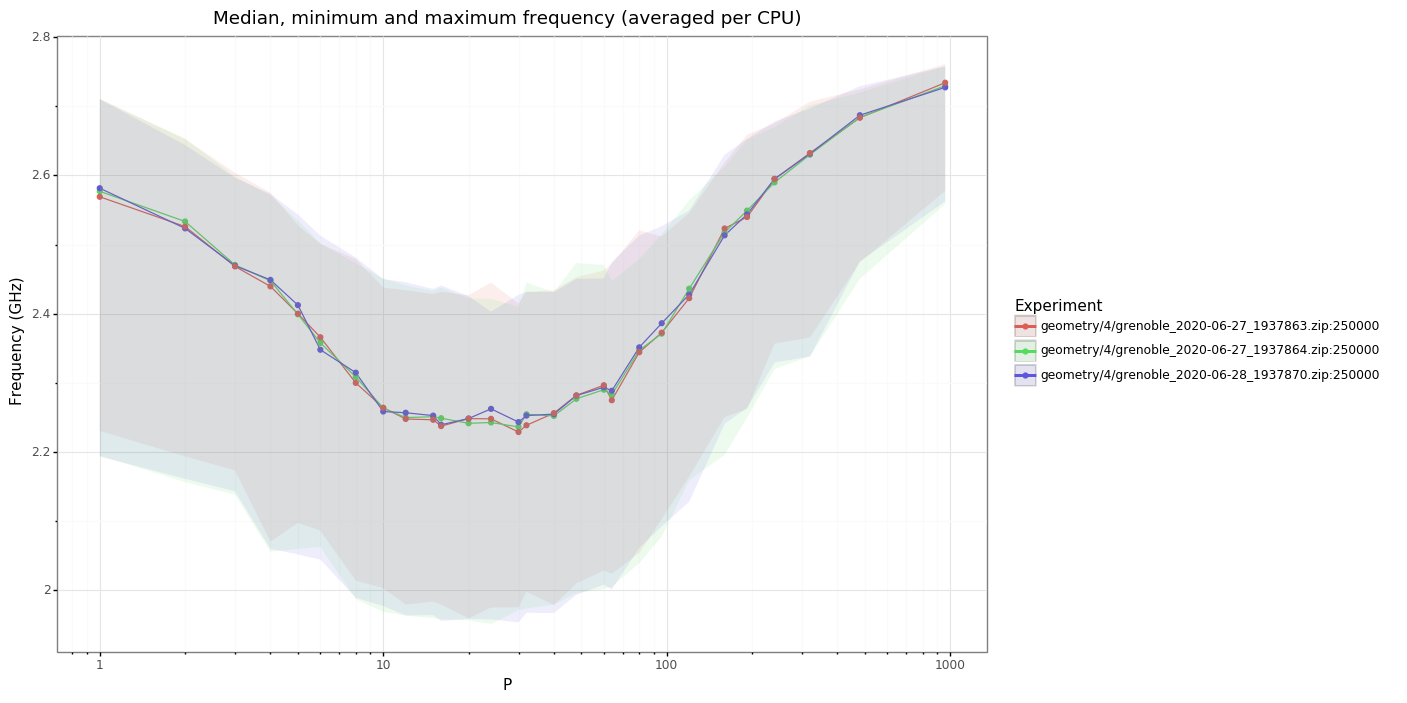

<ggplot: (-9223363301737594154)>

In [8]:
(ggplot(results.dropna())
    + aes(x='proc_p')
    + geom_line(aes(y='med_freq', color='group'))
    + geom_point(aes(y='med_freq', color='group'))
    + geom_ribbon(aes(ymin='min_freq', ymax='max_freq', fill='group'), alpha=0.1)
    + scale_x_log10()
    + theme_bw()
    + labs(x='P', y='Frequency (GHz)', color='Experiment', fill='Experiment')
    + ggtitle('Median, minimum and maximum frequency (averaged per CPU)')
)

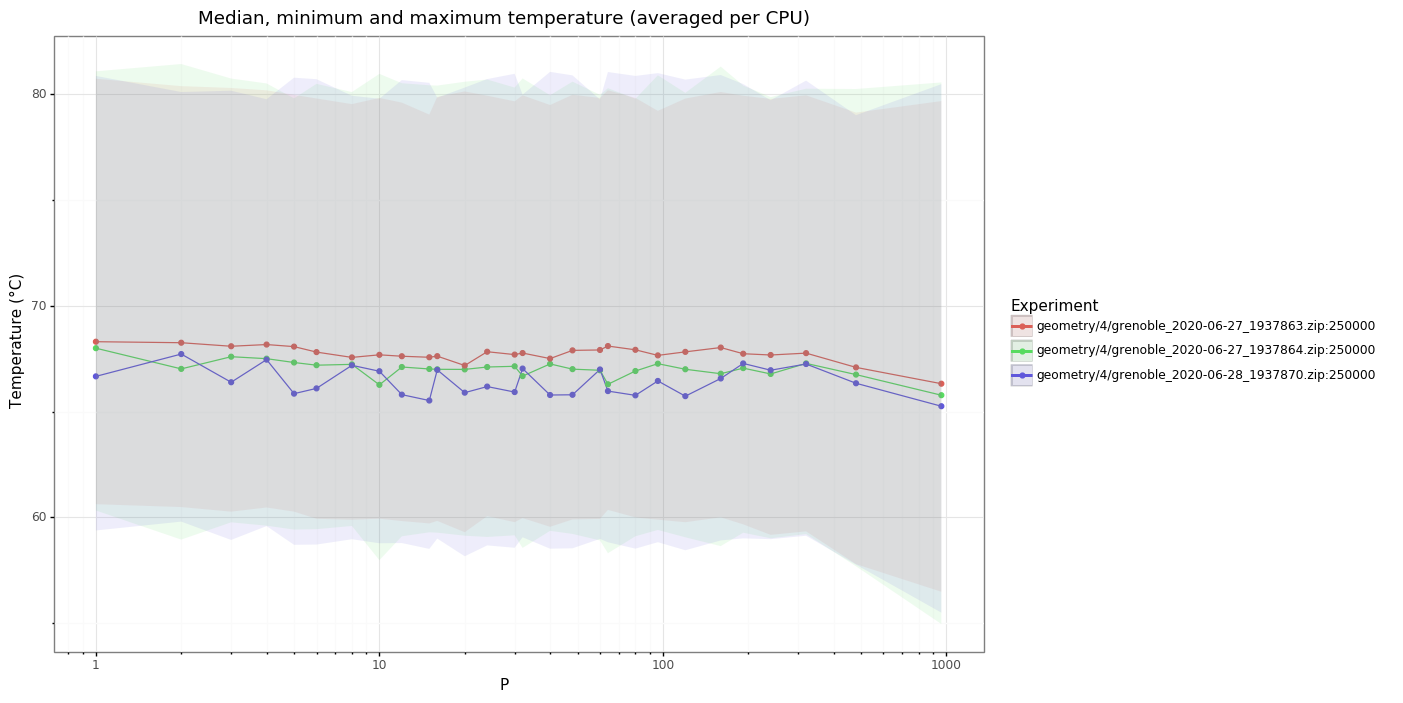

<ggplot: (8735116500004)>

In [9]:
(ggplot(results.dropna())
    + aes(x='proc_p')
    + geom_line(aes(y='med_temp', color='group'))
    + geom_point(aes(y='med_temp', color='group'))
    + geom_ribbon(aes(ymin='min_temp', ymax='max_temp', fill='group'), alpha=0.1)
    + scale_x_log10()
    + theme_bw()
    + labs(x='P', y='Temperature (°C)', color='Experiment', fill='Experiment')
    + ggtitle('Median, minimum and maximum temperature (averaged per CPU)')
)

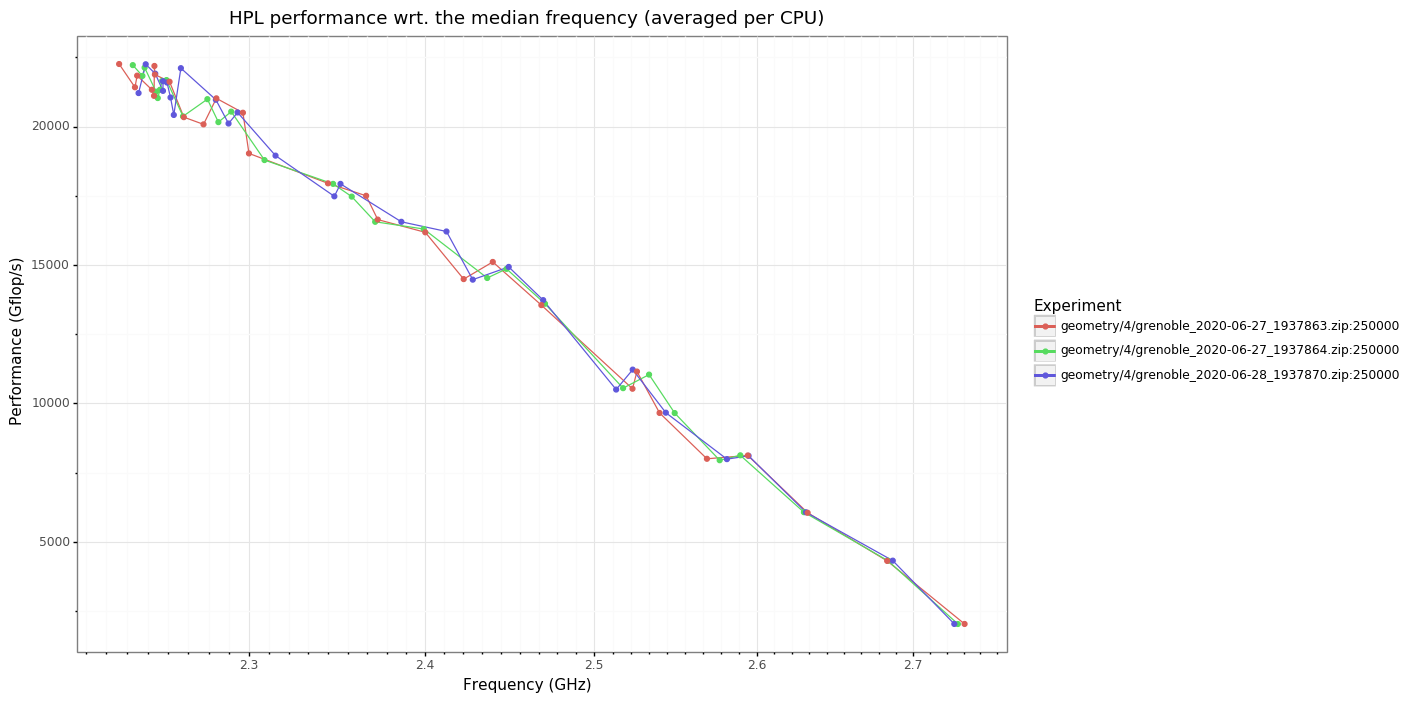

<ggplot: (8735083188891)>

In [10]:
(ggplot(results.dropna())
    + aes(x='med_freq', y='gflops', color='group')
    + geom_line()
    + geom_point()
    + scale_x_log10()
    + theme_bw()
    + labs(x='Frequency (GHz)', y='Performance (Gflop/s)', color='Experiment', fill='Experiment')
    + ggtitle('HPL performance wrt. the median frequency (averaged per CPU)')
)